<a href="https://colab.research.google.com/github/AkhileshMauryaa/Python_Machine_learning/blob/main/Bank_Term_Deposit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/bank term deposit.xlsx')

In [ ]:
df.sample(5)

,Age,Job,Marital,Education,Default,housing,Loan,Contact,Month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
5964,52,unknown,married,basic.4y,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
20225,29,technician,married,university.degree,unknown,yes,no,cellular,aug,mon,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
39261,80,retired,married,basic.4y,no,no,no,cellular,mar,fri,...,3,6,4,success,-1.8,93.369,-34.8,0.649,5008.7,yes
17267,59,retired,married,basic.9y,unknown,no,no,cellular,jul,fri,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,yes
10849,38,admin.,single,university.degree,no,yes,no,telephone,jun,wed,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no


# data information
1 - Age - Age of the customer and it’s a numerical variable.

2 - Job- The type of job a customer does and it’s a categorical variable.

3 - Marital : It’s self explanatory. It demonstrates the customer’s marital status and is a categorical variable.

4 - Education - Educational level of a customer and it’s a categorical variable.

5 - Default :Showcases if a cx has credit in default? (Categorical).

6 - housing: Tells you If a cx has a housing loan.(categorical).

7 - loan: Demonstrates you If a cx has a Personal loan (categorical).

8 - contact: contact communication type (categorical).

9 - month: last contact month of year (categorical).

10 - day_of_week: last contact day of the week (categorical).

11 - duration: last contact duration, in seconds (numeric).

12 - campaign: number of contacts performed for this client during this campaign (numeric).

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric).

14 - previous: number of contacts performed for this client before this campaign(numeric).

15 - poutcome: outcome of the previous marketing campaign (categorical).

16 - empvarrate: employment variation rate - quarterly indicator (numeric).

17 - conspriceidx: consumer price index - monthly indicator (numeric).

18 - consconfidx: consumer confidence index - monthly indicator (numeric).

19 - euribor3m: euribor 3 month rate - daily indicator (numeric).

20 - nremployed: number of employees - quarterly indicator (numeric).

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



In [ ]:
df.shape

(41188, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           41188 non-null  int64  
 1   Job           41188 non-null  object 
 2   Marital       41188 non-null  object 
 3   Education     41188 non-null  object 
 4   Default       41188 non-null  object 
 5   housing       41188 non-null  object 
 6   Loan          41188 non-null  object 
 7   Contact       41188 non-null  object 
 8   Month         41188 non-null  object 
 9   day_of_week   41188 non-null  object 
 10  duration      41188 non-null  int64  
 11  campaign      41188 non-null  int64  
 12  pdays         41188 non-null  int64  
 13  previous      41188 non-null  int64  
 14  poutcome      41188 non-null  object 
 15  empvarrate    41188 non-null  float64
 16  conspriceidx  41188 non-null  float64
 17  consconfidx   41188 non-null  float64
 18  euribor3m     41188 non-nu

In [ ]:
# here are not any null values any columns
df.isnull().sum()

Age             0
Job             0
Marital         0
Education       0
Default         0
housing         0
Loan            0
Contact         0
Month           0
day_of_week     0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
empvarrate      0
conspriceidx    0
consconfidx     0
euribor3m       0
nremployed      0
y               0
dtype: int64

In [ ]:
df.duplicated().sum()

12

here are 12 duplicate rows

In [ ]:
# remove duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
df.nunique()

Age               78
Job               12
Marital            4
Education          8
Default            3
housing            3
Loan               3
Contact            2
Month             10
day_of_week        5
duration        1544
campaign          42
pdays             27
previous           8
poutcome           3
empvarrate        10
conspriceidx      26
consconfidx       26
euribor3m        316
nremployed        11
y                  2
dtype: int64

In [ ]:
# find unique values each columns
pd.Series({col: df[col].unique() for col in df.columns})

Age             [56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5...
Job             [housemaid, services, admin., blue-collar, tec...
Marital                      [married, single, divorced, unknown]
Education       [basic.4y, high.school, basic.6y, basic.9y, pr...
Default                                        [no, unknown, yes]
housing                                        [no, yes, unknown]
Loan                                           [no, yes, unknown]
Contact                                     [telephone, cellular]
Month           [may, jun, jul, aug, oct, nov, dec, mar, apr, ...
day_of_week                             [mon, tue, wed, thu, fri]
duration        [261, 149, 226, 151, 307, 198, 139, 217, 380, ...
campaign        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19...
pdays           [999, 6, 4, 3, 5, 1, 0, 10, 7, 8, 9, 11, 2, 12...
previous                                 [0, 1, 2, 3, 4, 5, 6, 7]
poutcome                          [nonexistent, failure, success]
empvarrate

In [ ]:
df.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'housing', 'Loan',
       'Contact', 'Month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'empvarrate', 'conspriceidx', 'consconfidx',
       'euribor3m', 'nremployed', 'y'],
      dtype='object')

In [ ]:
df.dtypes

Age               int64
Job              object
Marital          object
Education        object
Default          object
housing          object
Loan             object
Contact          object
Month            object
day_of_week      object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
empvarrate      float64
conspriceidx    float64
consconfidx     float64
euribor3m       float64
nremployed      float64
y                object
dtype: object

In [ ]:
df.describe()

,Age,duration,campaign,pdays,previous,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.describe(include='object')

,Job,Marital,Education,Default,housing,Loan,Contact,Month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


In [ ]:
df['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

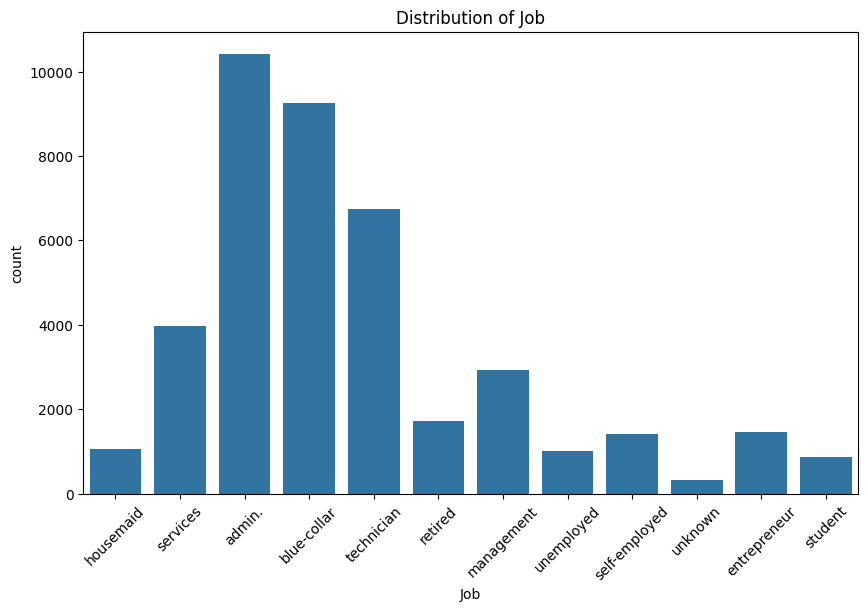

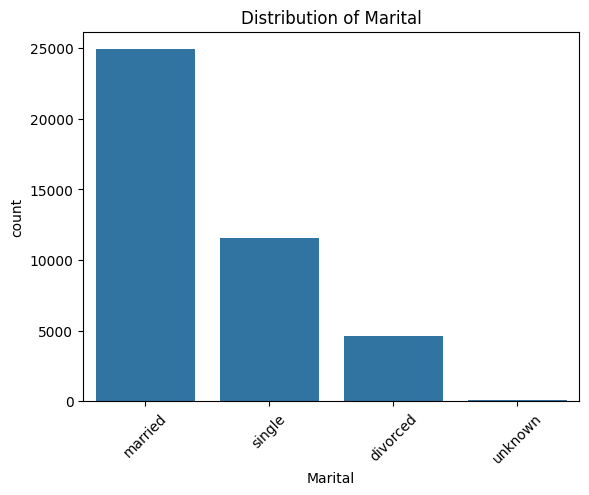

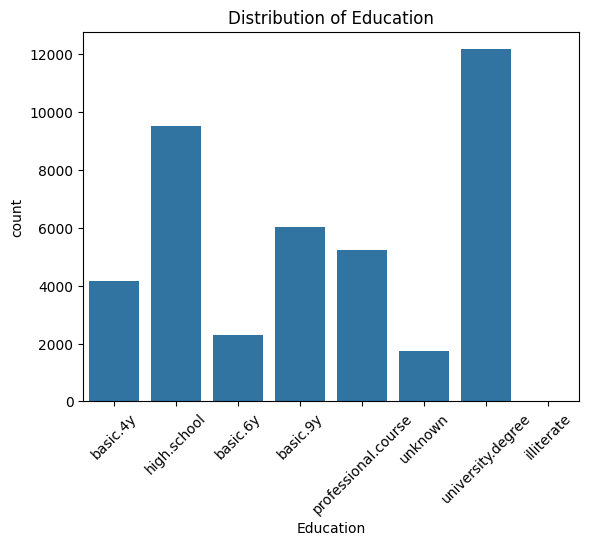

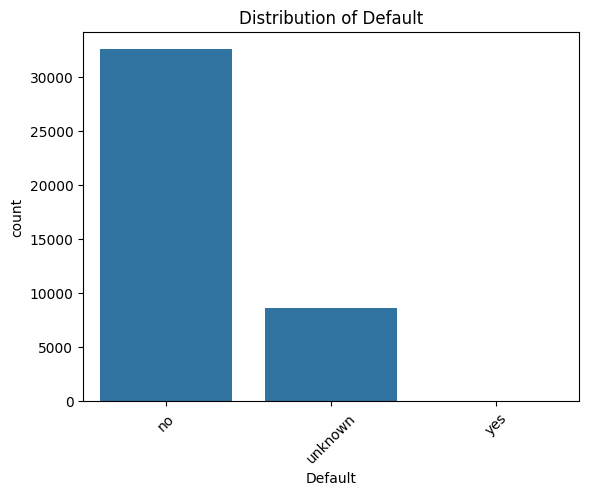

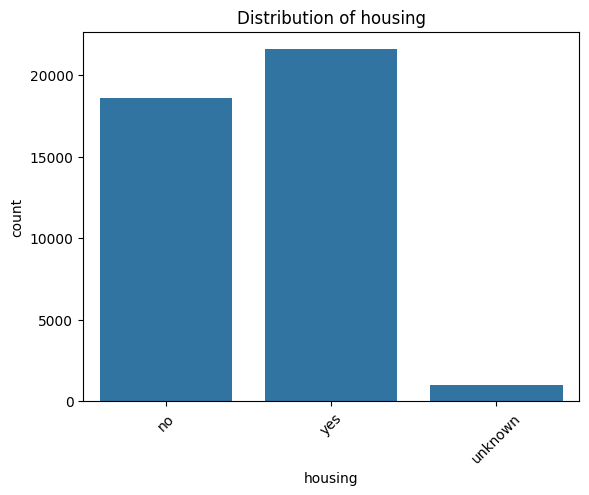

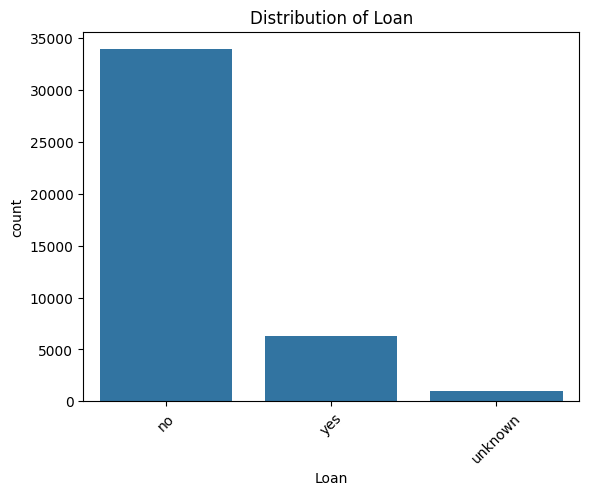

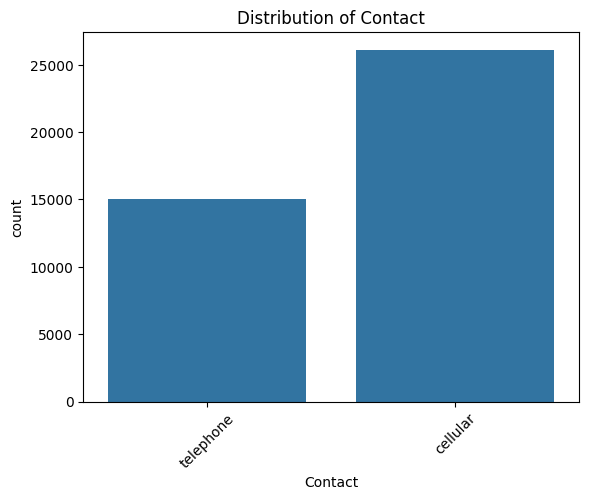

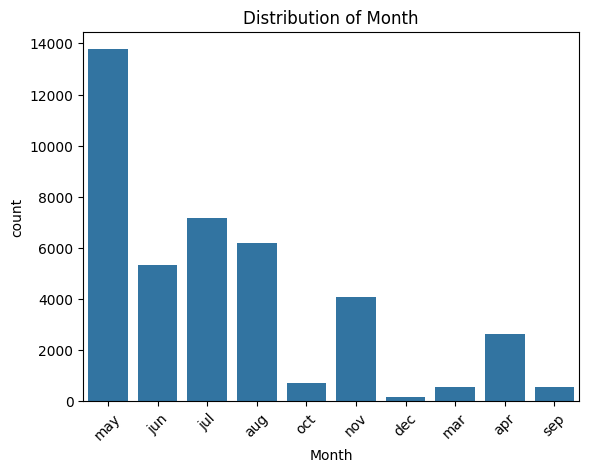

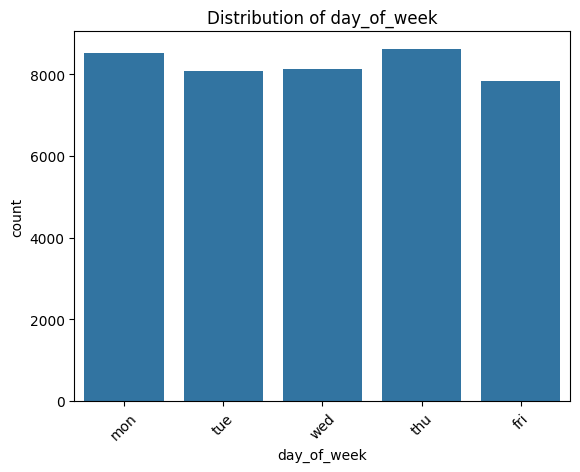

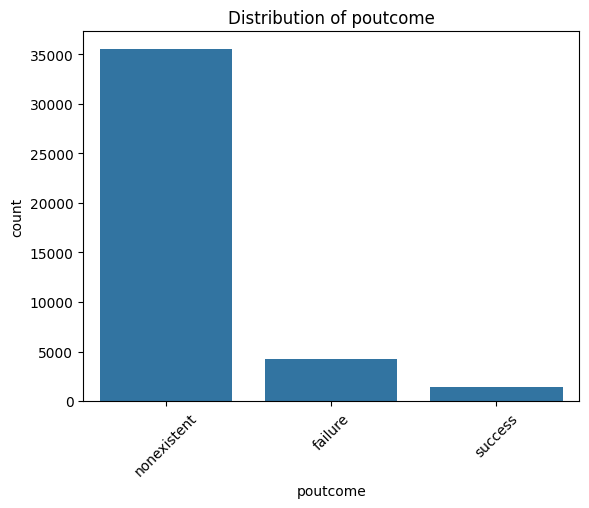

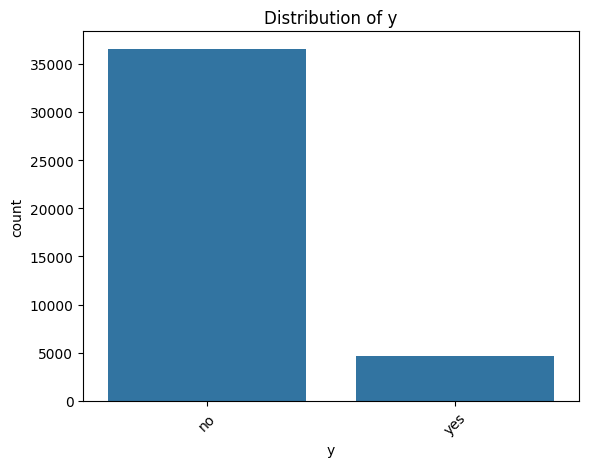

In [ ]:
# Categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(10,6))
for col in categorical_columns:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


# insights

1.job:-Clients with admin as job type are maximum in the bank and the least are unknown job type clients.Blue-collar job clients take the second place from the top.

2.Marital:- most of clients are married

3.Education:- most of clients university graduated

4.houseing:-most of clients have house and some are not

5.loan:-most of clients donts takes any loan

6.month:- most of clients connected May, June, July and August in month

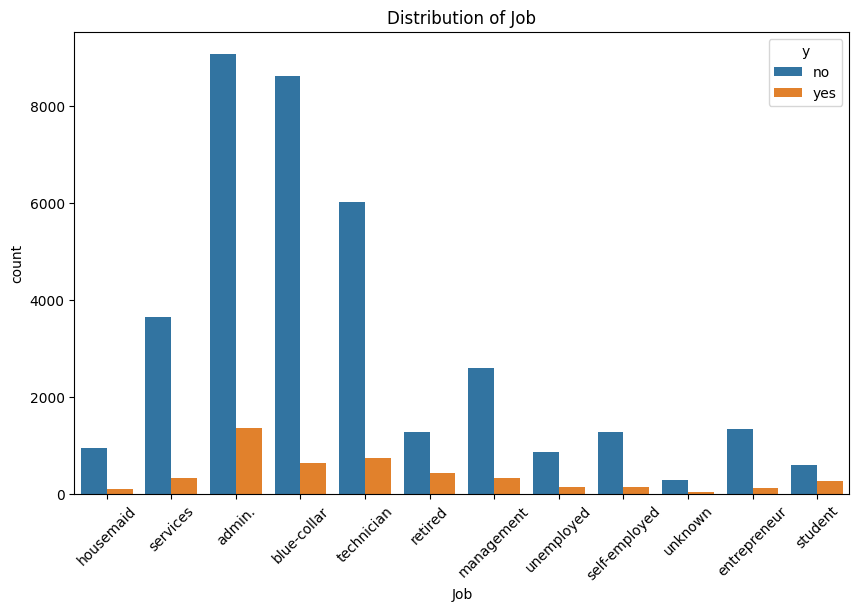

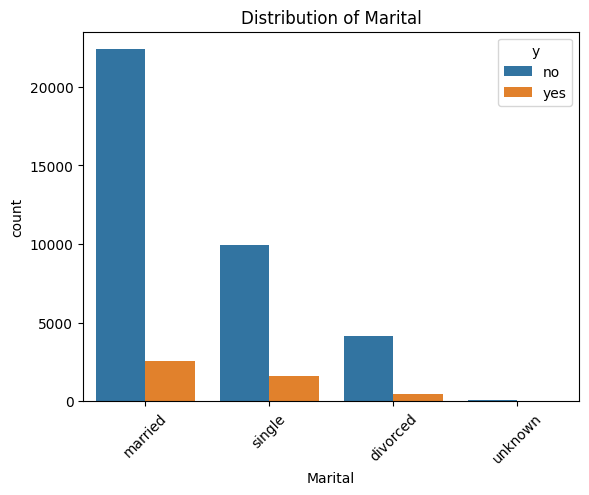

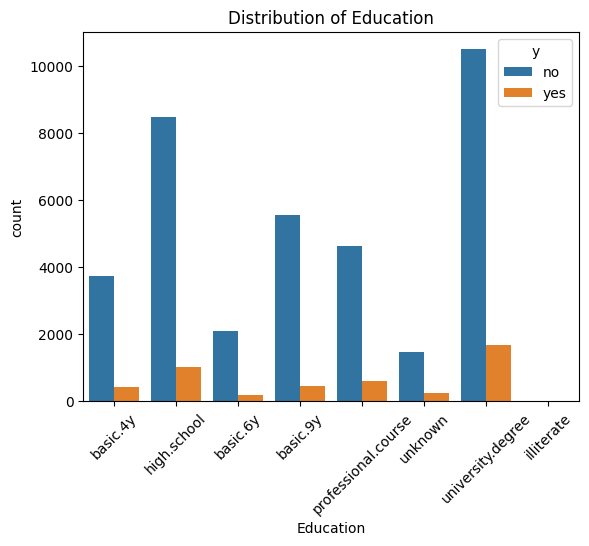

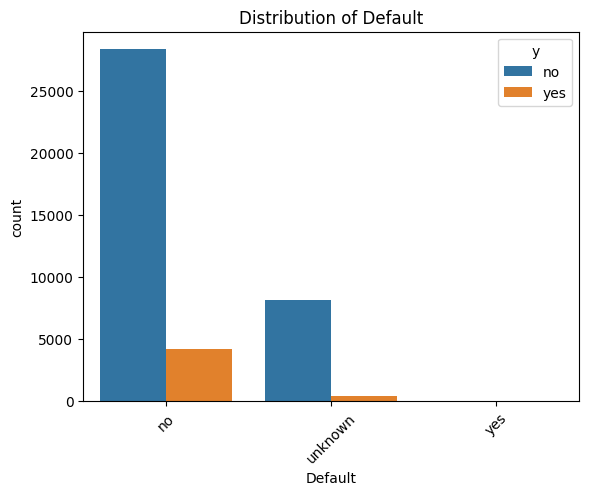

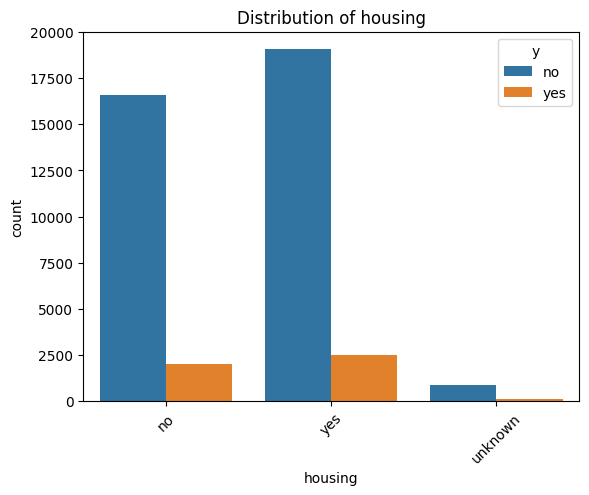

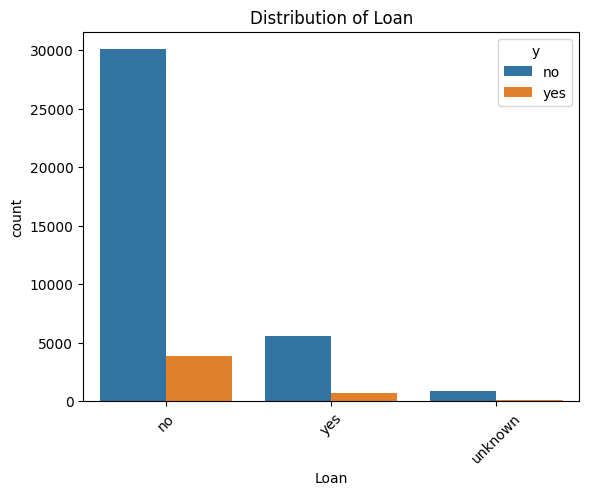

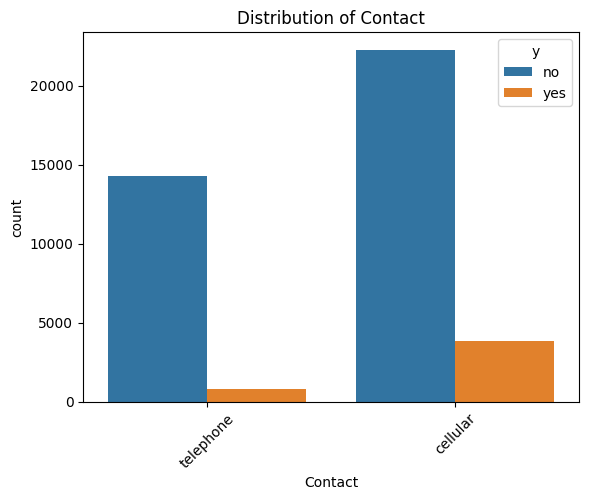

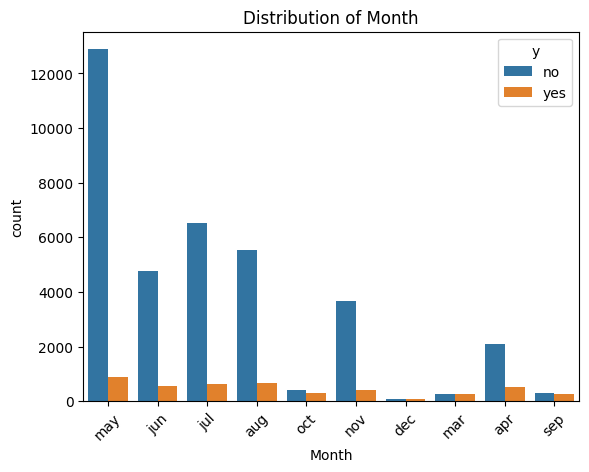

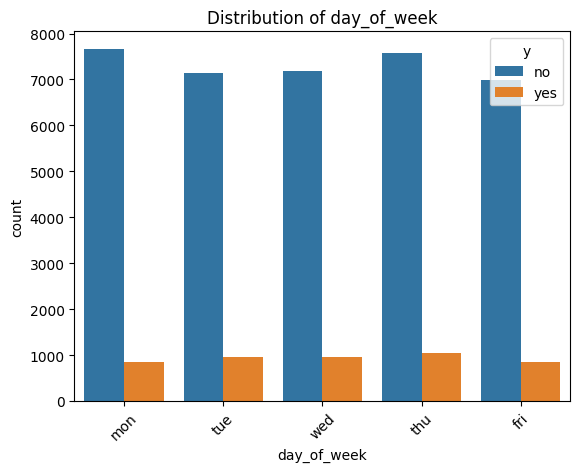

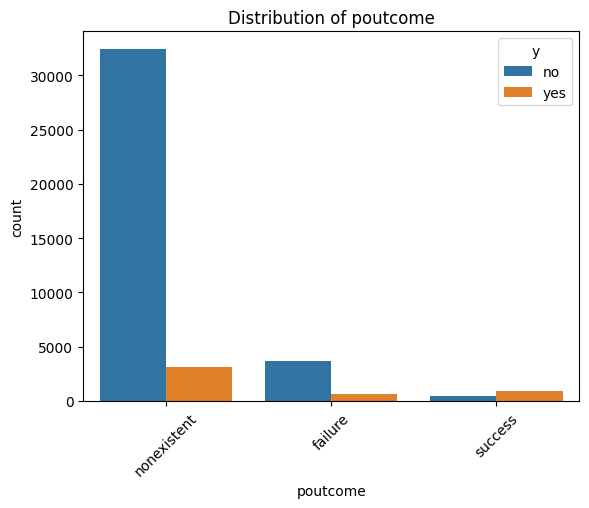

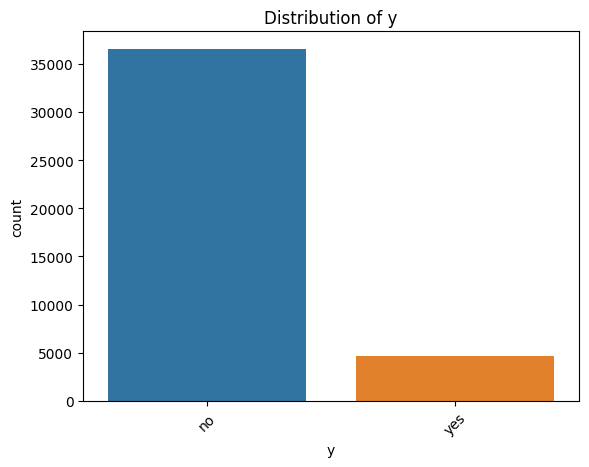

In [ ]:
# Categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(10,6))
for col in categorical_columns:
    sns.countplot(x=col, data=df,hue='y')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# insights
1. job:-Out of all people who have subscribed, admin people have the highest subscriptions followed by other.

2. marital:-Out of all people who have subscribed, married people have the highest subscriptions followed by other two.

3. education:- Out of all students who have subscribed, University people have the highest subscriptions followed by other.

4. housing:- Out of all people who have subscribed, who have own house highest subscriptions followed by other.

5. loan:- Out of all people who have subscribed, who have not taken any loan highest subscriptions followed by other.

6. Out of all people who have subscribed, may,jun,july and aug have highest subscriptions followed by other month.

7. weekly subscription are good.


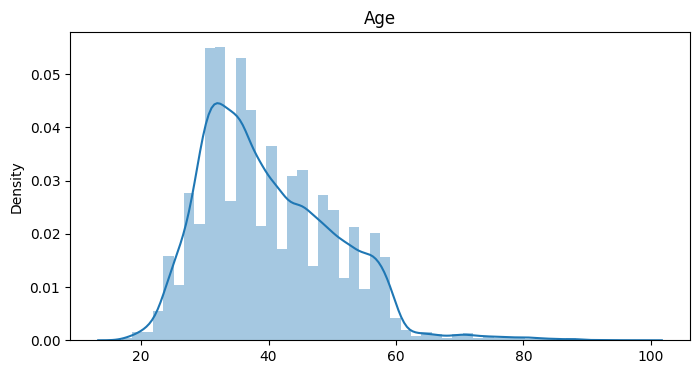

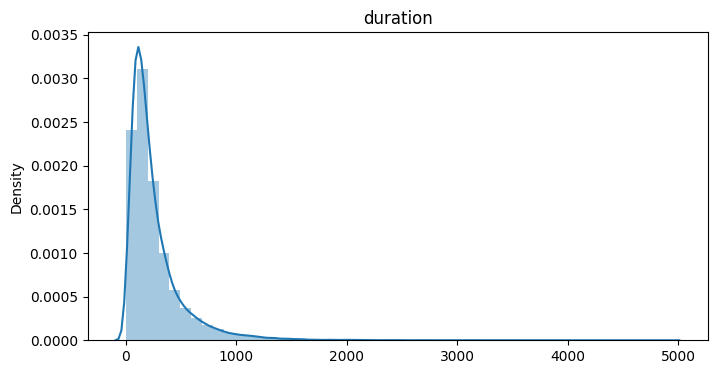

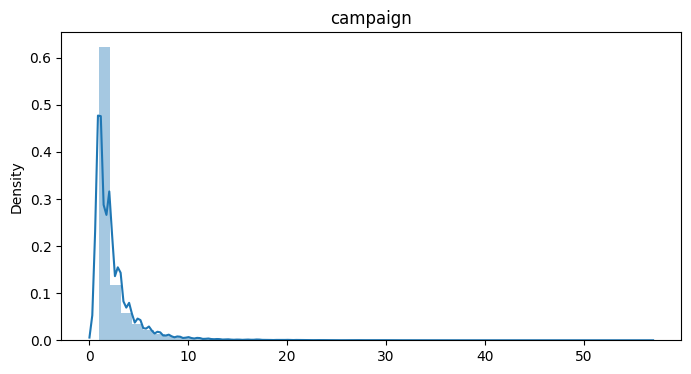

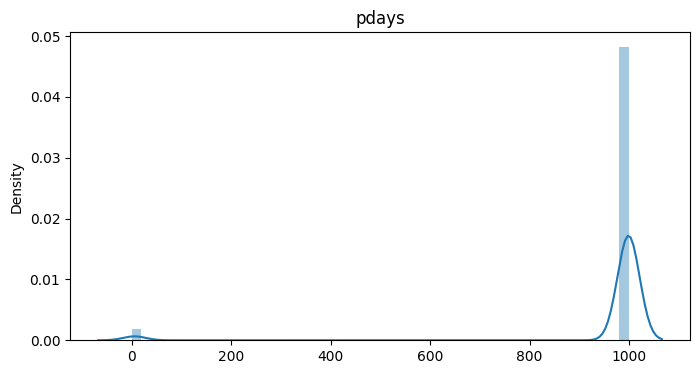

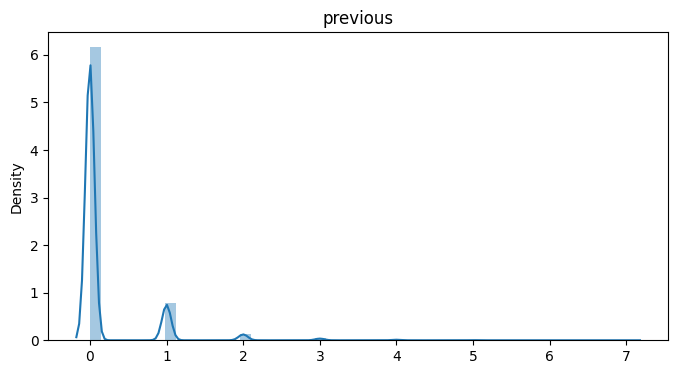

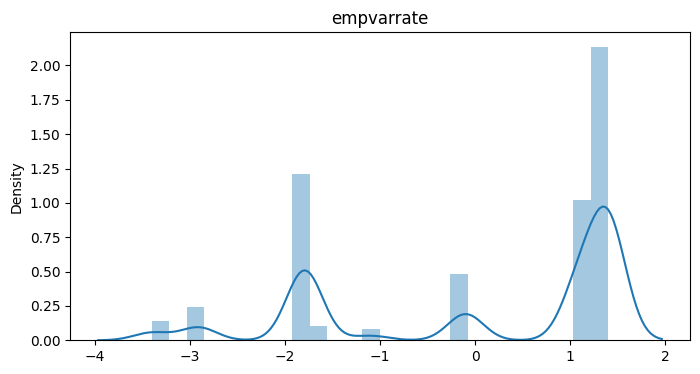

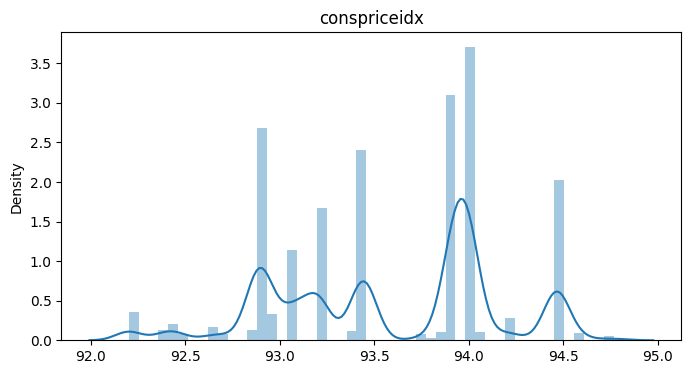

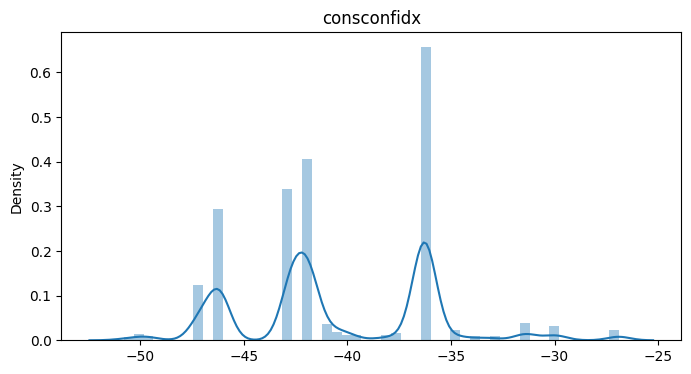

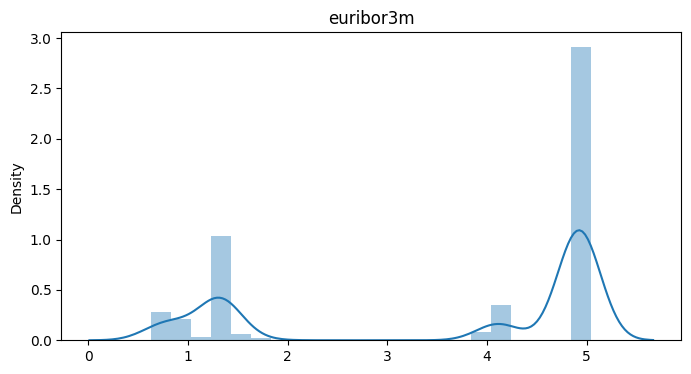

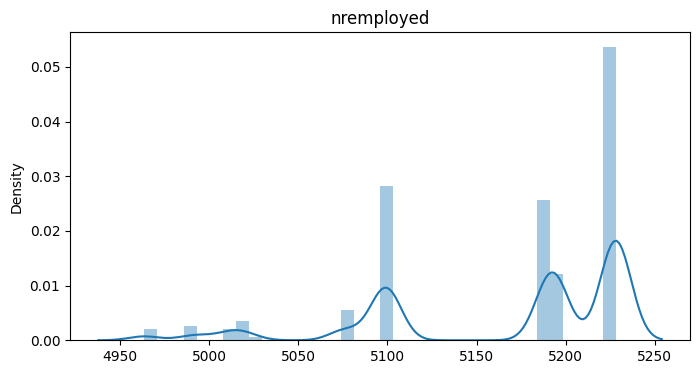

In [ ]:
num_columns = df.select_dtypes(include=['int','float']).columns

for cols in num_columns:
  plt.figure(figsize=(8,4))
  sns.distplot(x=df[cols])
  plt.title(f"{cols}")
  plt.show()

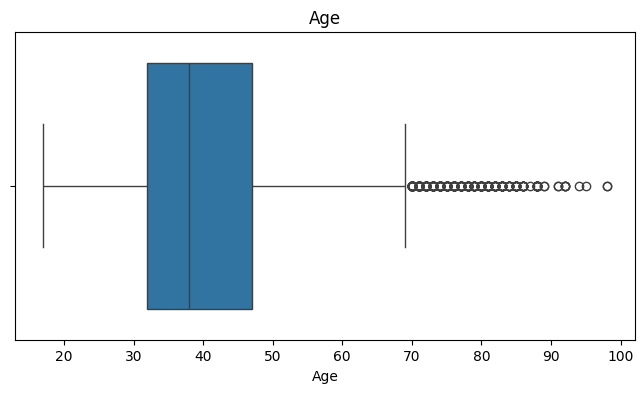

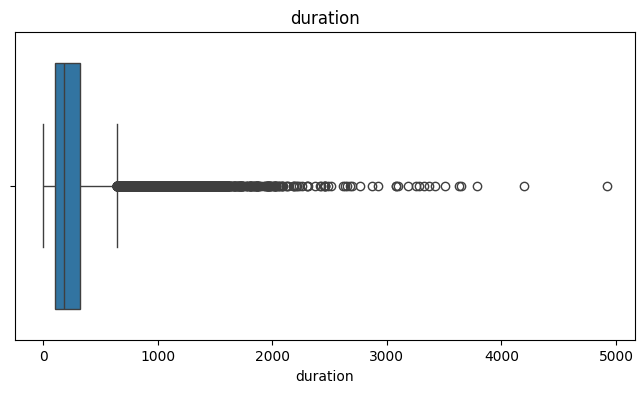

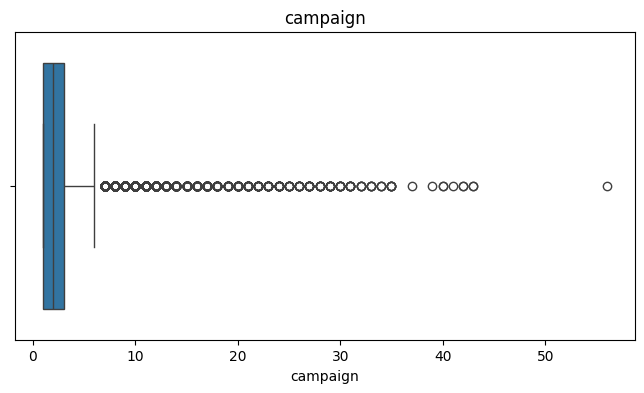

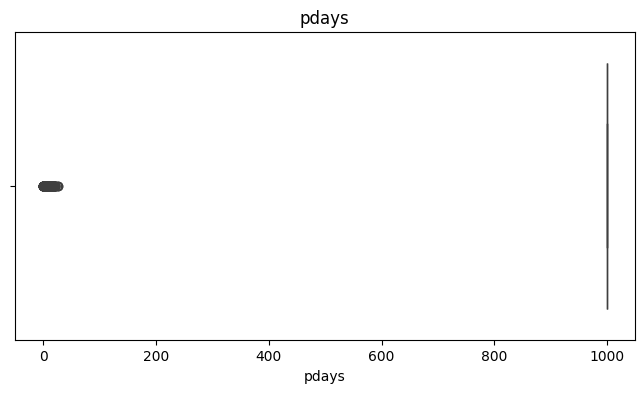

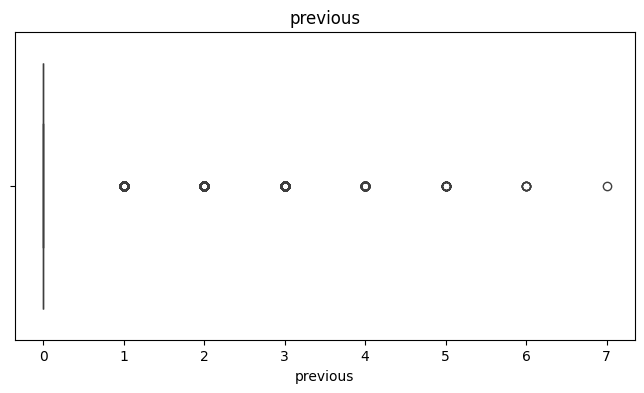

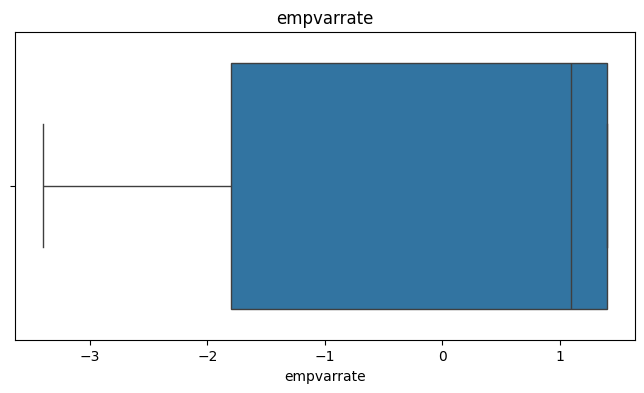

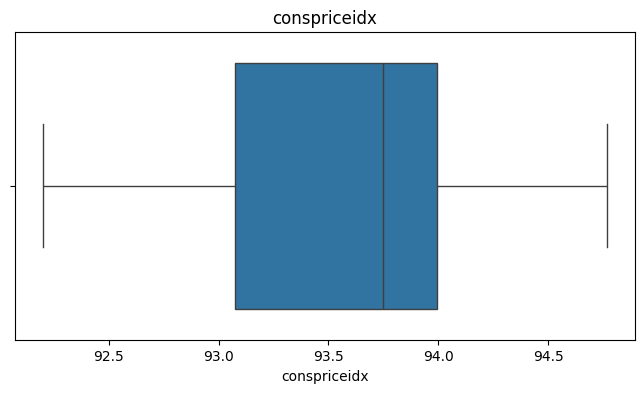

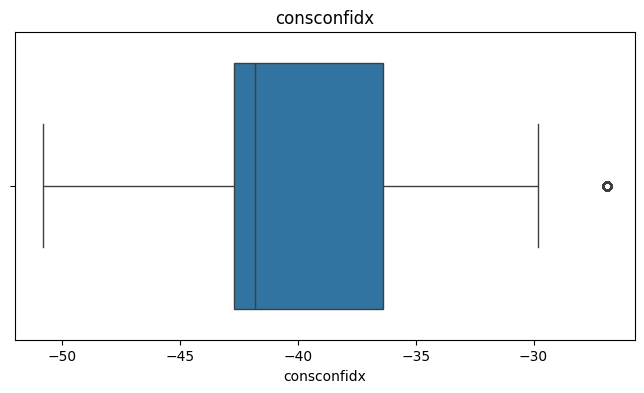

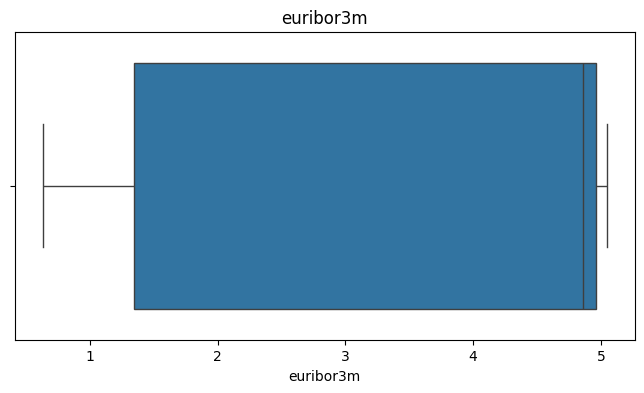

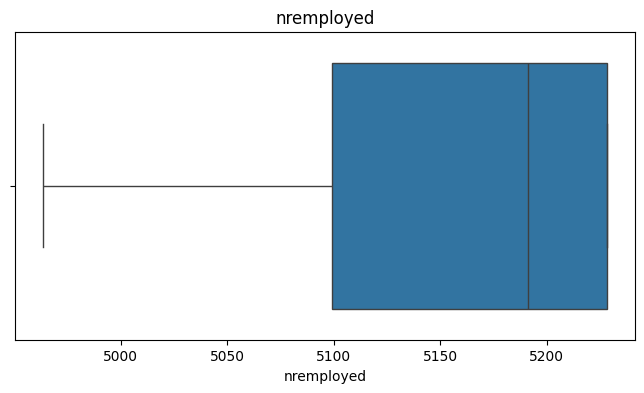

In [ ]:
num_columns = df.select_dtypes(include=['int','float']).columns

for cols in num_columns:
  plt.figure(figsize=(8,4))
  sns.boxplot(data=df,x=cols)
  plt.title(f"{cols}")
  plt.show()

# now time i am not remove any outliers if my accuracy not coming good that time,i will be remove outlier

In [ ]:
df1 = df.copy()

# Feature Engineering

In [ ]:
df1.head(1)

,Age,Job,Marital,Education,Default,housing,Loan,Contact,Month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
#df1 = pd.get_dummies(df1,columns=["Job","Marital", "Education", "Default", "day_of_week","Month","poutcome","Contact","housing","Loan"],drop_first=True)

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#df1['y'] = LabelEncoder().fit_transform(df1['y'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in ["Job","Marital", "Education", "Default", "day_of_week","Month","poutcome","Contact","housing","Loan","y"]:
  df1[col] = LabelEncoder().fit_transform(df1[col])

In [ ]:
df1.head()

,Age,Job,Marital,Education,Default,housing,Loan,Contact,Month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


# Examine multicollinearity using VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature']=df1.columns
# calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]
print(vif_data)

         feature           VIF
0            Age     19.750319
1            Job      2.120020
2        Marital      5.655916
3      Education      4.465785
4        Default      1.405054
5        housing      2.205772
6           Loan      1.207876
7        Contact      2.867920
8          Month      6.844070
9    day_of_week      3.086046
10      duration      2.451816
11      campaign      1.930734
12         pdays    166.324812
13      previous      5.964625
14      poutcome     34.169783
15    empvarrate     40.720000
16  conspriceidx  38875.067588
17   consconfidx    131.865990
18     euribor3m    333.492262
19    nremployed  44294.366566
20             y      1.714541


I am dropping the columns based on the results I have gotten from VIF.

In [ ]:
df1 = df1.drop(['Age','pdays','poutcome','empvarrate','conspriceidx','consconfidx','euribor3m','nremployed'],axis=1)

In [ ]:
df1.head()

,Job,Marital,Education,Default,housing,Loan,Contact,Month,day_of_week,duration,campaign,previous,y
0,3,1,0,0,0,0,1,6,1,261,1,0,0
1,7,1,3,1,0,0,1,6,1,149,1,0,0
2,7,1,3,0,2,0,1,6,1,226,1,0,0
3,0,1,1,0,0,0,1,6,1,151,1,0,0
4,7,1,3,0,0,2,1,6,1,307,1,0,0


## Split Data Into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
x = df1.drop(['y'],axis=1)
y = df1['y']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)

(28823, 12)
(12353, 12)


# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_train

array([[-0.47664322, -0.28333937, -0.81764805, ..., -0.22109932,
         0.51918344, -0.34718659],
       [-0.75476873, -0.28333937, -0.81764805, ...,  6.55526628,
        -0.57249939, -0.34718659],
       [-1.03289423,  1.35820651,  1.05621203, ..., -0.8381844 ,
        -0.57249939, -0.34718659],
       ...,
       [ 0.3577333 , -0.28333937, -1.75457809, ..., -0.02826023,
        -0.20860511,  3.70749702],
       [ 0.07960779, -0.28333937,  1.05621203, ...,  0.14529495,
        -0.20860511, -0.34718659],
       [ 1.19210982,  1.35820651, -0.81764805, ..., -0.65691566,
         0.51918344, -0.34718659]])

In [ ]:
x_test = sc.transform(x_test)
x_test

array([[ 0.3577333 , -0.28333937,  0.58774701, ...,  4.63844573,
        -0.57249939, -0.34718659],
       [-0.75476873, -0.28333937, -0.81764805, ..., -0.03597379,
        -0.57249939,  1.68015521],
       [ 1.47023533, -0.28333937,  0.58774701, ...,  0.06815931,
        -0.20860511, -0.34718659],
       ...,
       [-1.03289423,  1.35820651,  1.05621203, ..., -0.07839839,
        -0.20860511, -0.34718659],
       [-1.03289423, -0.28333937,  1.05621203, ..., -0.46021979,
        -0.20860511, -0.34718659],
       [-0.75476873, -0.28333937, -0.81764805, ..., -0.96160142,
         1.24697199, -0.34718659]])

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

In [ ]:
df1['y'].value_counts()

0    36537
1     4639
Name: y, dtype: int64

# above we can our data imbalanced

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x, y)

In [ ]:
y_smote.value_counts()

0    36537
1    36537
Name: y, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.8218021153056636

In [ ]:
lr_pred = lr.predict(x_test)

accuracy = accuracy_score(y_test,lr_pred)
clf_report = classification_report(y_test,lr_pred)
print("logistic regression")
print(f"accuracy:", accuracy)
print(clf_report)

logistic regression
accuracy: 0.8193677872553938
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     11029
           1       0.81      0.83      0.82     10894

    accuracy                           0.82     21923
   macro avg       0.82      0.82      0.82     21923
weighted avg       0.82      0.82      0.82     21923



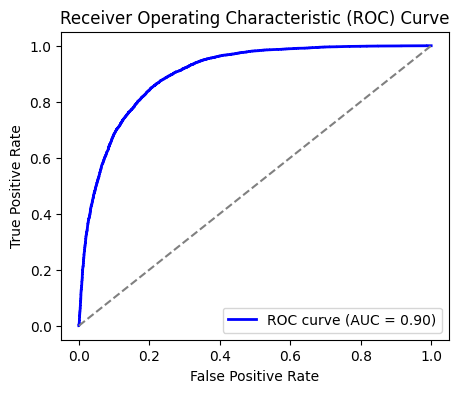

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate predicted probabilities
y_scores = lr.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# random Forest

In [ ]:
rand = RandomForestClassifier()
rand.fit(x_train,y_train)
rand.score(x_train,y_train)

0.9999022502003871

In [ ]:
rand_pred = rand.predict(x_test)

accuracy = accuracy_score(y_test,rand_pred)
clf_report = classification_report(y_test,rand_pred)
print("random forest")
print(f"accuracy:", accuracy)
print(clf_report)

random forest
accuracy: 0.920950599826666
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     11029
           1       0.90      0.94      0.92     10894

    accuracy                           0.92     21923
   macro avg       0.92      0.92      0.92     21923
weighted avg       0.92      0.92      0.92     21923



# decision Tree

In [ ]:
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
d_tree.score(x_train,y_train)

0.9999022502003871

In [ ]:
d_tree_pred = d_tree.predict(x_test)

accuracy = accuracy_score(y_test,d_tree_pred)
clf_report = classification_report(y_test,d_tree_pred)
print("decision tree classifier")
print(f"accuracy:", accuracy)
print(clf_report)

decision tree classifier
accuracy: 0.8903434748893856
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     11029
           1       0.88      0.91      0.89     10894

    accuracy                           0.89     21923
   macro avg       0.89      0.89      0.89     21923
weighted avg       0.89      0.89      0.89     21923



# KNeighbors Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.9324744384274012

In [ ]:
knn_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test,knn_pred)
clf_report = classification_report(y_test,knn_pred)
print("knn classifier")
print(f"accuracy:", accuracy)
print(clf_report)

knn classifier
accuracy: 0.884413629521507
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     11029
           1       0.82      0.99      0.89     10894

    accuracy                           0.88     21923
   macro avg       0.90      0.89      0.88     21923
weighted avg       0.90      0.88      0.88     21923



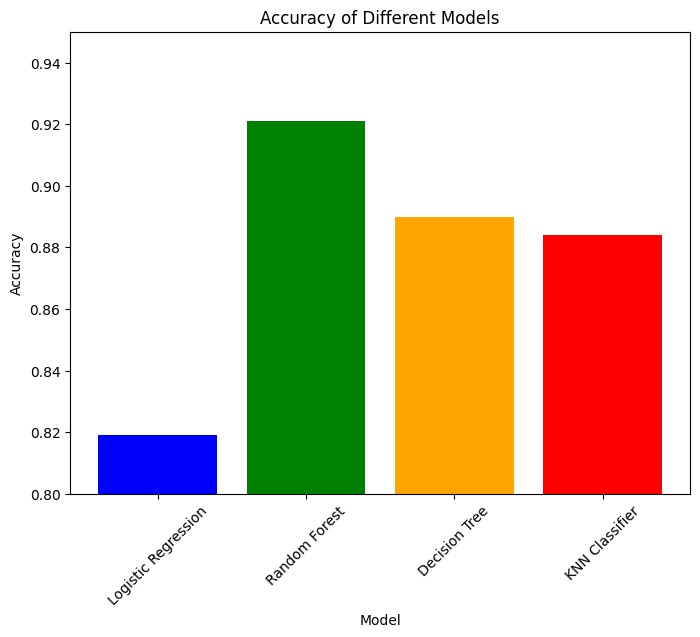

In [ ]:
# Model names and accuracy scores
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN Classifier']
accuracy_scores = [0.819, 0.921, 0.890, 0.884]  # Update with your actual accuracy scores

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.8, 0.95)  # Set y-axis limit for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


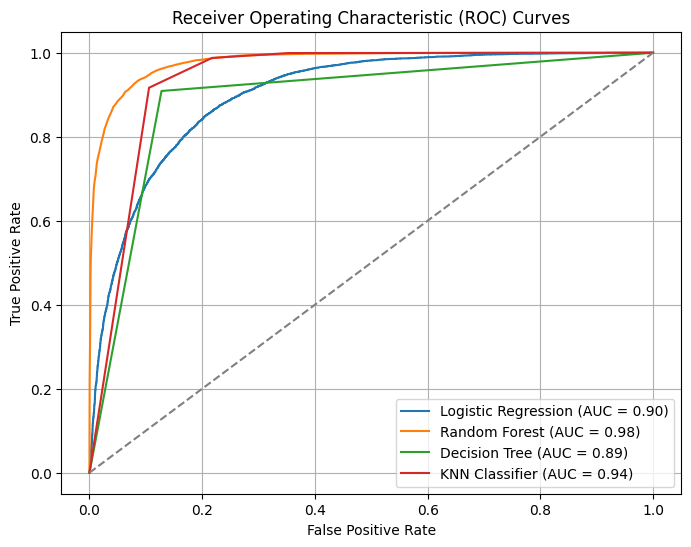

In [ ]:
# Assuming you have trained your models and obtained predicted probabilities for the positive class
models = {'Logistic Regression': lr, 'Random Forest': rand, 'Decision Tree': d_tree, 'KNN Classifier': knn}

plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    # Calculate predicted probabilities
    y_scores = model.predict_proba(x_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)

    # Calculate AUC
    auc_score = roc_auc_score(y_test, y_scores)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

# Plot ROC curve for random guessing (diagonal line)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')

# Show plot
plt.grid(True)
plt.show()


# insight and conclusion:


*   Each model achieved respectable performance in predicting the target variable, as indicated by their respective accuracy scores. The Logistic Regression model attained an accuracy of approximately 82%, followed by Random Forest with around 92%, Decision Tree with about 89%, and KNN Classifier with approximately 88%.
*   While Random Forest achieved the highest accuracy among the models.

